In [1]:
import imbalance_experiment_mnist_generator
import imbalance_experiment_mnist_sampler

from imbalance_experiment_mnist_generator import *
from imbalance_experiment_mnist_sampler import *

import torch
from torch.nn import Module
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
from torchvision import models

import random
from copy import deepcopy

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

from imblearn.metrics import (geometric_mean_score, sensitivity_score, 
                              specificity_score)
from sklearn.metrics import (balanced_accuracy_score, precision_score, 
                             recall_score, f1_score)


import scipy as sc
import matplotlib.style

params = {'legend.fontsize': 14,
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize' :14,
          'ytick.labelsize': 13,
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.8,
          'mathtext.fontset' : 'stix',
          'mathtext.rm'      : 'serif',
          'font.family'      : 'serif',
          'font.serif'       : "Times New Roman", # or "Times"          
         }
matplotlib.rcParams.update(params)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /usr/local/src/pytorch/torch/csrc/utils/tensor_numpy.cpp:174.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
if torch.cuda.is_available():
    print("life is good")

device = torch.device("cuda")

life is good


In [3]:
trainloader_collection = [
                          [trainloader_mnist_1, trainloader_mnist_2, trainloader_mnist_3], 
                          [MNIST_S1_Undersample_Trainloader, MNIST_S2_Undersample_Trainloader, MNIST_S3_Undersample_Trainloader], 
                          [MNIST_S1_Oversample_Trainloader, MNIST_S2_Oversample_Trainloader, MNIST_S3_Oversample_Trainloader], 
                          [MNIST_S1_SMOTE_Trainloader, MNIST_S2_SMOTE_Trainloader, MNIST_S3_SMOTE_Trainloader]
                         ]

testloader_collection = [testloader_mnist_1, testloader_mnist_2, testloader_mnist_3]

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
    
output_size_network = len(classes)

epochs=150

In [4]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=output_size_network):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model1 = ConvNet()
model1= nn.DataParallel(model1)
model1 = model1.to(device)

model2 = ConvNet()
model2= nn.DataParallel(model2)
model2 = model2.to(device)

model3 = ConvNet()
model3= nn.DataParallel(model3)
model3 = model3.to(device)

model4 = ConvNet()
model4 = nn.DataParallel(model4)
model4 = model4.to(device)

model5 = ConvNet()
model5 = nn.DataParallel(model5)
model5 = model5.to(device)

model6 = ConvNet()
model6 = nn.DataParallel(model6)
model6 = model6.to(device)

model7 = ConvNet()
model7 = nn.DataParallel(model7)
model7 = model7.to(device)

model8 = ConvNet()
model8 = nn.DataParallel(model8)
model8 = model8.to(device)

model9 = ConvNet()
model9 = nn.DataParallel(model9)
model9 = model9.to(device)

model10 = ConvNet()
model10 = nn.DataParallel(model10)
model10 = model10.to(device)

model11 = ConvNet()
model11 = nn.DataParallel(model11)
model11 = model11.to(device)

model12 = ConvNet()
model12 = nn.DataParallel(model12)
model12 = model12.to(device)

In [5]:
model = [[model1, model2, model3], [model4, model5, model6], [model7, model8, model9], [model10, model11, model12]]

criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer2 = optim.SGD(model2.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer3 = optim.SGD(model3.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer4 = optim.SGD(model4.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer5 = optim.SGD(model5.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer6 = optim.SGD(model6.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer7 = optim.SGD(model7.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer8 = optim.SGD(model8.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer9 = optim.SGD(model9.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer10 = optim.SGD(model10.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer11 = optim.SGD(model11.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
optimizer12 = optim.SGD(model12.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)


optimizer = [[optimizer1, optimizer2, optimizer3], [optimizer4, optimizer5, optimizer6], [optimizer7, optimizer8, optimizer9], [optimizer10, optimizer11, optimizer12]]

sampling_methods = [0, 1, 2, 3]
settings = [0, 1, 2]

In [6]:
train_loss_hist = []

for sampling_method in zip(sampling_methods):
    sampling_method = int(''.join(map(str, sampling_method)))

    for setting in zip(settings): 
        setting = int(''.join(map(str, setting)))
    
        print('-------------------')
        if sampling_method == 0:
            print('SAMPLER: None')
        elif sampling_method == 1:
            print('SAMPLER: RUS')
        elif sampling_method == 2:
            print('SAMPLER: ROS')
        elif sampling_method == 3:
            print('SAMPLER: SMOTE')

        if setting == 0:
            print('Half-Split Imbalance')
        elif setting == 1:
            print('Multimajority')
        elif setting == 2:
            print('Multiminority')
        print('-------------------')

        np.random.seed(setting)
        torch.manual_seed(setting)
        random.seed(setting)
        torch.cuda.manual_seed(setting)

        for epoch in range(1, epochs+1):  
            train_loss = 0.0

            model[sampling_method][setting].train()
            for data, labels in trainloader_collection[sampling_method][setting]:
                data, labels = data.to(device), labels.to(device)
                optimizer[sampling_method][setting].zero_grad()
                outputs = model[sampling_method][setting](data)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer[sampling_method][setting].step()

                train_loss += loss.item()

            train_loss = train_loss/len(trainloader_collection[sampling_method][setting])
            train_loss_hist.append(train_loss)

            print('Setting: {} \tEpoch: {} \tTraining Loss: {:.3f}'.format(setting, 
                epoch, train_loss))
    
        if setting == 0:
            print('Finished Training for setting', setting)
        elif setting == 1:
            print('Finished Training for setting', setting)
        elif setting == 2:
            print('Finished Training for setting', setting) 

-------------------
SAMPLER: None
Half-Split Imbalance
-------------------
Setting: 0 	Epoch: 1 	Training Loss: 0.104
Setting: 0 	Epoch: 2 	Training Loss: 0.039
Setting: 0 	Epoch: 3 	Training Loss: 0.024
Setting: 0 	Epoch: 4 	Training Loss: 0.016
Setting: 0 	Epoch: 5 	Training Loss: 0.012
Setting: 0 	Epoch: 6 	Training Loss: 0.010
Setting: 0 	Epoch: 7 	Training Loss: 0.005
Setting: 0 	Epoch: 8 	Training Loss: 0.003
Setting: 0 	Epoch: 9 	Training Loss: 0.002
Setting: 0 	Epoch: 10 	Training Loss: 0.002
Setting: 0 	Epoch: 11 	Training Loss: 0.001
Setting: 0 	Epoch: 12 	Training Loss: 0.001
Setting: 0 	Epoch: 13 	Training Loss: 0.001
Setting: 0 	Epoch: 14 	Training Loss: 0.001
Setting: 0 	Epoch: 15 	Training Loss: 0.001
Setting: 0 	Epoch: 16 	Training Loss: 0.001
Setting: 0 	Epoch: 17 	Training Loss: 0.001
Setting: 0 	Epoch: 18 	Training Loss: 0.001
Setting: 0 	Epoch: 19 	Training Loss: 0.000
Setting: 0 	Epoch: 20 	Training Loss: 0.000
Setting: 0 	Epoch: 21 	Training Loss: 0.000
Setting: 0

In [7]:
train_hist = np.array_split(train_loss_hist, 12)
none_s1_train_hist = train_hist[0]
none_s2_train_hist = train_hist[1]
none_s3_train_hist = train_hist[2]

ros_s1_train_hist = train_hist[6]
ros_s2_train_hist = train_hist[7]
ros_s3_train_hist = train_hist[8]

smote_s1_train_hist = train_hist[9]
smote_s2_train_hist = train_hist[10]
smote_s3_train_hist = train_hist[11]

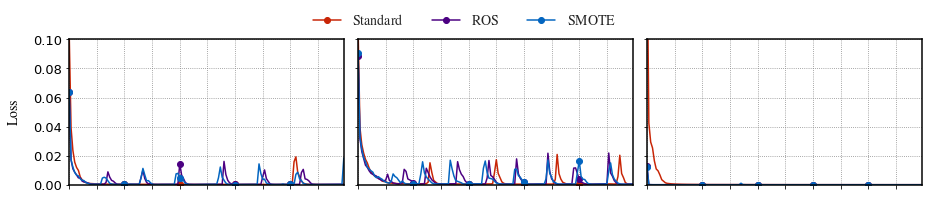

In [8]:
fig, axes = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(13, 2.5)
sns.set_style("whitegrid")

#3 different plots, one for each setting, and within each plot have 3 lines for each sampling (Ignore RUS)
axes[0].plot(none_s1_train_hist, color='#C82506', marker='o', markevery=30, label=r'$\mathrm{Standard}$')
axes[0].plot(ros_s1_train_hist, color='indigo', marker='o', markevery=30, label=r'$\mathrm{ROS}$')
axes[0].plot(smote_s1_train_hist, color='#0365C0', marker='o', markevery=30, label=r'$\mathrm{SMOTE}$')

axes[1].plot(none_s2_train_hist, color='#C82506', marker='o', markevery=30)
axes[1].plot(ros_s2_train_hist, color='indigo', marker='o', markevery=30)
axes[1].plot(smote_s2_train_hist, color='#0365C0', marker='o', markevery=30)

axes[2].plot(none_s3_train_hist, color='#C82506', marker='o', markevery=30)
axes[2].plot(ros_s3_train_hist, color='indigo', marker='o', markevery=30)
axes[2].plot(smote_s3_train_hist, color='#0365C0', marker='o', markevery=30)

fig.legend(loc='center', bbox_to_anchor=(0.5, 1.02), ncol=3, frameon=False)

axes[0].set_ylabel(r'$\mathrm{Loss}$')
axes[0].yaxis.labelpad = 12
axes[0].set_ylim([0, 0.1])

axes[0].grid(color="gray")
axes[0].margins(x=0)
axes[0].margins(y=0)

axes[1].grid(color="gray")
axes[1].margins(x=0)
axes[1].margins(y=0)

axes[2].grid(color="gray")
axes[2].margins(x=0)
axes[2].margins(y=0)

axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[2].xaxis.set_major_locator(MaxNLocator(integer=True))

for axis in ['top','bottom','left','right']:
    axes[0].spines[axis].set_color('0')
    axes[1].spines[axis].set_color('0')
    axes[2].spines[axis].set_color('0')

for axis in ['top','bottom','left','right']:
    axes[0].spines[axis].set_linewidth(1.5)
    axes[1].spines[axis].set_linewidth(1.5)
    axes[2].spines[axis].set_linewidth(1.5)

axes[0].axes.xaxis.set_ticklabels([])
axes[1].axes.xaxis.set_ticklabels([])
axes[2].axes.xaxis.set_ticklabels([])

plt.savefig("mnist_imbalance_resampling_withoutunder_final.png", bbox_inches='tight', dpi=1200)
plt.tight_layout()

In [9]:
model_updated = [[model1, model2, model3], [model4, model5, model6], [model7, model8, model9], [model10, model11, model12]]

In [10]:
global_accuracy = []
test_loss_hist = []
labels_list = []
pred_list= []
class_accuracy_model =[]

for sampling_method in zip(sampling_methods):
    sampling_method = int(''.join(map(str, sampling_method)))

    for setting in zip(settings): 
        setting = int(''.join(map(str, setting)))
        
        test_loss = 0.0
        correct = 0
        total = 0
        
        correct_pred = {classname: 0 for classname in classes}
        total_pred = {classname: 0 for classname in classes}
        
        model_updated[sampling_method][setting].eval()
        
        with torch.no_grad():
            for data, labels in testloader_collection[setting]:
                images, labels = data.to(device), labels.to(device)
                output = model_updated[sampling_method][setting](images)
    
                loss = criterion(output, labels)
                test_loss += loss.item()

                _, pred = torch.max(output, 1)    

                total += labels.size(0)
                correct += (pred == labels).sum().item()
                
                for label, p in zip(labels, pred):
                    if label == p:
                        correct_pred[classes[label]] += 1
                    total_pred[classes[label]] += 1

                pred = pred.cpu().detach().numpy()
                labels = labels.cpu().detach().numpy()

                pred_list.append(pred)
                labels_list.append(labels)

        test_loss = test_loss/len(testloader_collection[setting])
        test_loss_hist.append(test_loss)
        
        accuracy = 100 * correct / total
        global_accuracy.append(accuracy)
        
        for classname, correct_count in correct_pred.items():
            model_seed_accuracy = 100 * float(correct_count) / total_pred[classname]
            class_accuracy_model.append(model_seed_accuracy)

In [11]:
print('-------------')
print('SAMPLER: NONE')
print('-------------')
print('Test Loss S1: {:.3f}'.format(test_loss_hist[0]))
print('Test Loss S2: {:.3f}'.format(test_loss_hist[1]))
print('Test Loss S3: {:.3f}'.format(test_loss_hist[2]))

print('-------------')
print('SAMPLER: RUS')
print('-------------')
print('Test Loss S1: {:.3f}'.format(test_loss_hist[3]))
print('Test Loss S2: {:.3f}'.format(test_loss_hist[4]))
print('Test Loss S3: {:.3f}'.format(test_loss_hist[5]))


print('-------------')
print('SAMPLER: ROS')
print('-------------')
print('Test Loss S1: {:.3f}'.format(test_loss_hist[6]))
print('Test Loss S2: {:.3f}'.format(test_loss_hist[7]))
print('Test Loss S3: {:.3f}'.format(test_loss_hist[8]))          


print('-------------')
print('SAMPLER: SMOTE')
print('-------------')
print('Test Loss S1: {:.3f}'.format(test_loss_hist[9]))
print('Test Loss S2: {:.3f}'.format(test_loss_hist[10]))
print('Test Loss S3: {:.3f}'.format(test_loss_hist[11]))

-------------
SAMPLER: NONE
-------------
Test Loss S1: 0.284
Test Loss S2: 0.042
Test Loss S3: 0.276
-------------
SAMPLER: RUS
-------------
Test Loss S1: 1.300
Test Loss S2: 0.890
Test Loss S3: 0.722
-------------
SAMPLER: ROS
-------------
Test Loss S1: 0.173
Test Loss S2: 0.033
Test Loss S3: 0.140
-------------
SAMPLER: SMOTE
-------------
Test Loss S1: 0.215
Test Loss S2: 0.039
Test Loss S3: 0.152


In [12]:
print('-------------')
print('SAMPLER: NONE')
print('-------------')
print('Test Accuracy S1: {:.3f}%'.format(global_accuracy[0]))
print('Test Accuracy S2: {:.3f}%'.format(global_accuracy[1]))
print('Test Accuracy S3: {:.3f}%'.format(global_accuracy[2]))

print('-------------')
print('SAMPLER: RUS')
print('-------------')
print('Test Accuracy S1: {:.3f}%'.format(global_accuracy[3]))
print('Test Accuracy S2: {:.3f}%'.format(global_accuracy[4]))
print('Test Accuracy S3: {:.3f}%'.format(global_accuracy[5]))


print('-------------')
print('SAMPLER: ROS')
print('-------------')
print('Test Accuracy S1: {:.3f}%'.format(global_accuracy[6]))
print('Test Accuracy S2: {:.3f}%'.format(global_accuracy[7]))
print('Test Accuracy S3: {:.3f}%'.format(global_accuracy[8]))         


print('-------------')
print('SAMPLER: SMOTE')
print('-------------')
print('Test Accuracy S1: {:.3f}%'.format(global_accuracy[9]))
print('Test Accuracy S2: {:.3f}%'.format(global_accuracy[10]))
print('Test Accuracy S3: {:.3f}%'.format(global_accuracy[11]))

-------------
SAMPLER: NONE
-------------
Test Accuracy S1: 92.622%
Test Accuracy S2: 99.237%
Test Accuracy S3: 95.069%
-------------
SAMPLER: RUS
-------------
Test Accuracy S1: 75.711%
Test Accuracy S2: 79.703%
Test Accuracy S3: 84.977%
-------------
SAMPLER: ROS
-------------
Test Accuracy S1: 95.489%
Test Accuracy S2: 99.376%
Test Accuracy S3: 96.789%
-------------
SAMPLER: SMOTE
-------------
Test Accuracy S1: 94.378%
Test Accuracy S2: 99.334%
Test Accuracy S3: 96.445%


In [13]:
class_accuracy_model = np.array_split(class_accuracy_model, 12)
class_accuracy_model

[array([52.66666667, 89.33333333, 45.33333333, 62.66666667, 42.        ,
        99.86666667, 99.46666667, 99.46666667, 99.6       , 98.93333333]),
 array([99.75 , 99.625, 99.5  , 99.25 , 99.75 , 99.25 , 98.5  , 99.125,
        99.375,  0.   ]),
 array([ 12.5, 100. ,  87.5,  37.5,   0. ,   0. ,  25. ,  62.5,  37.5,
        100. ]),
 array([90.        , 98.        , 78.        , 85.33333333, 88.        ,
        66.93333333, 88.8       , 83.2       , 69.2       , 58.26666667]),
 array([72.25 , 97.375, 75.5  , 75.125, 76.875, 70.875, 89.25 , 81.125,
        79.25 , 50.   ]),
 array([ 87.5  , 100.   , 100.   ,  87.5  ,  62.5  ,  62.5  ,  50.   ,
         87.5  ,  62.5  ,  85.625]),
 array([ 82.        ,  96.66666667,  62.        ,  69.33333333,
         68.66666667, 100.        ,  99.46666667,  99.73333333,
         99.6       ,  98.4       ]),
 array([99.625, 99.625, 99.25 , 99.375, 99.75 , 99.375, 99.25 , 99.625,
        99.5  ,  0.   ]),
 array([ 50. , 100. ,  87.5,  62.5,  12.5,  25. 

In [14]:
slices = [4500, 7208, 872, 4500, 7208, 872, 4500, 7208, 872, 4500, 7208, 872]

def imbalance_slicer(mylist):
    return [mylist[sum(slices[:i]):sum(slices[:i+1])] for i in range(len(slices))]

In [15]:
pred_list = [item for sublist in pred_list for item in sublist]
labels_list = [item for sublist in labels_list for item in sublist]

pred_model1 = imbalance_slicer(pred_list)[0]
pred_model2 = imbalance_slicer(pred_list)[1]
pred_model3 = imbalance_slicer(pred_list)[2]

pred_model4 = imbalance_slicer(pred_list)[3]
pred_model5 = imbalance_slicer(pred_list)[4]
pred_model6 = imbalance_slicer(pred_list)[5]

pred_model7 = imbalance_slicer(pred_list)[6]
pred_model8 = imbalance_slicer(pred_list)[7]
pred_model9 = imbalance_slicer(pred_list)[8]

pred_model10 = imbalance_slicer(pred_list)[9]
pred_model11 = imbalance_slicer(pred_list)[10]
pred_model12 = imbalance_slicer(pred_list)[11]

labels_s1 = imbalance_slicer(labels_list)[0]
labels_s2 = imbalance_slicer(labels_list)[1]
labels_s3 = imbalance_slicer(labels_list)[2]

labels_s4 = imbalance_slicer(labels_list)[3]
labels_s5 = imbalance_slicer(labels_list)[4]
labels_s6 = imbalance_slicer(labels_list)[5]

labels_s7 = imbalance_slicer(labels_list)[6]
labels_s8 = imbalance_slicer(labels_list)[7]
labels_s9 = imbalance_slicer(labels_list)[8]

labels_s10 = imbalance_slicer(labels_list)[9]
labels_s11 = imbalance_slicer(labels_list)[10]
labels_s12 = imbalance_slicer(labels_list)[11]

In [16]:
pred_list = [[pred_model1, pred_model2, pred_model3], [pred_model4, pred_model5, pred_model6], 
             [pred_model7, pred_model8, pred_model9], [pred_model10, pred_model11, pred_model12]]

labels_list = [[labels_s1, labels_s2, labels_s3], [labels_s4, labels_s5, labels_s6],
               [labels_s7, labels_s8, labels_s9], [labels_s10, labels_s11, labels_s12]]

f1_micro_list, f1_macro_list = [], []
gmean_micro_list, gmean_macro_list = [], []
bac_list, bac_adj_list = [], []
sens_micro_list, sens_macro_list = [], []
spec_micro_list, spec_macro_list = [], []
prec_micro_list, prec_macro_list = [], []
rec_micro_list, rec_macro_list = [], []

for sampling_method in zip(sampling_methods):
    sampling_method = int(''.join(map(str, sampling_method)))

    for setting in zip(settings):
        setting = int(''.join(map(str, setting)))
        
        f1_micro = f1_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='micro')
        f1_macro = f1_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='macro')
        f1_micro_list.append(f1_micro)
        f1_macro_list.append(f1_macro)
        
        gmean_micro = geometric_mean_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='micro')
        gmean_macro = geometric_mean_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='macro')
        gmean_micro_list.append(gmean_micro)
        gmean_macro_list.append(gmean_macro)
        
        bac = balanced_accuracy_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting])
        bac_adj = balanced_accuracy_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], adjusted=True)
        bac_list.append(bac)
        bac_adj_list.append(bac_adj)
        
        sens_micro = sensitivity_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='micro')
        sens_macro = sensitivity_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='macro')
        sens_micro_list.append(sens_micro)
        sens_macro_list.append(sens_macro)
        
        spec_micro = specificity_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='micro')
        spec_macro = specificity_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='macro')
        spec_micro_list.append(sens_micro)
        spec_macro_list.append(sens_macro)
                                       
        prec_micro = precision_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='micro')
        prec_macro = precision_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='macro')
        prec_micro_list.append(prec_micro)
        prec_macro_list.append(prec_macro)
                                       
        rec_micro = recall_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='micro')
        rec_macro = recall_score(labels_list[sampling_method][setting], pred_list[sampling_method][setting], average='macro')
        rec_micro_list.append(rec_micro)
        rec_macro_list.append(rec_macro)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

In [17]:
metrics_list = [f1_micro_list, f1_macro_list, gmean_micro_list, gmean_macro_list, bac_list, bac_adj_list, sens_micro_list, 
                sens_macro_list, spec_micro_list, spec_macro_list,
                prec_micro_list, prec_macro_list, rec_micro_list, rec_macro_list]

names = ["F1 Micro", "F1 Macro", "GMean Micro", "GMean Macro", "Balanced Accuracy", "Adjusted Balanced Accuracy", 
         "Sensitivity Micro", "Sensitivity Macro", "Specificity Micro", 
         "Specificity Macro", "Precision Micro", "Precision Macro", "Recall Micro", "Recall Macro"]

for metric, name in zip(metrics_list, names):
    print('---------------')
    print('SAMPLER: NONE')
    print('SETTING: S1')
    print('METRIC:', name)
    print('---------------')
    print(' {:.2f}'.format(metric[0]))
    
    print('---------------')
    print('SAMPLER: NONE')
    print('SETTING: S2')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[1]))
    
    print('---------------')
    print('SAMPLER: NONE')
    print('SETTING: S3')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[2]))
    
    print('\n')

    print('---------------')
    print('SAMPLER: RUS')
    print('SETTING: S1')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[3]))

    print('---------------')
    print('SAMPLER: RUS')
    print('SETTING: S2')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[4]))

    print('---------------')
    print('SAMPLER: RUS')
    print('SETTING: S3')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[5]))

    print('\n')

    print('---------------')
    print('SAMPLER: ROS')
    print('SETTING: S1')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[6]))

    print('---------------')
    print('SAMPLER: ROS')
    print('SETTING: S2')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[7]))

    print('---------------')
    print('SAMPLER: ROS')
    print('SETTING: S3')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[8]))

    print('\n')

    print('---------------')
    print('SAMPLER: SMOTE')
    print('SETTING: S1')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[9]))

    print('---------------')
    print('SAMPLER: SMOTE')
    print('SETTING: S2')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[10]))

    print('---------------')
    print('SAMPLER: SMOTE')
    print('SETTING: S3')
    print('METRIC:', name)
    print('---------------')
    print('{:.2f}'.format(metric[11]))

    print('\n')

---------------
SAMPLER: NONE
SETTING: S1
METRIC: F1 Micro
---------------
 0.93
---------------
SAMPLER: NONE
SETTING: S2
METRIC: F1 Micro
---------------
0.99
---------------
SAMPLER: NONE
SETTING: S3
METRIC: F1 Micro
---------------
0.95


---------------
SAMPLER: RUS
SETTING: S1
METRIC: F1 Micro
---------------
0.76
---------------
SAMPLER: RUS
SETTING: S2
METRIC: F1 Micro
---------------
0.80
---------------
SAMPLER: RUS
SETTING: S3
METRIC: F1 Micro
---------------
0.85


---------------
SAMPLER: ROS
SETTING: S1
METRIC: F1 Micro
---------------
0.95
---------------
SAMPLER: ROS
SETTING: S2
METRIC: F1 Micro
---------------
0.99
---------------
SAMPLER: ROS
SETTING: S3
METRIC: F1 Micro
---------------
0.97


---------------
SAMPLER: SMOTE
SETTING: S1
METRIC: F1 Micro
---------------
0.94
---------------
SAMPLER: SMOTE
SETTING: S2
METRIC: F1 Micro
---------------
0.99
---------------
SAMPLER: SMOTE
SETTING: S3
METRIC: F1 Micro
---------------
0.96


---------------
SAMPLER: NONE
SETT